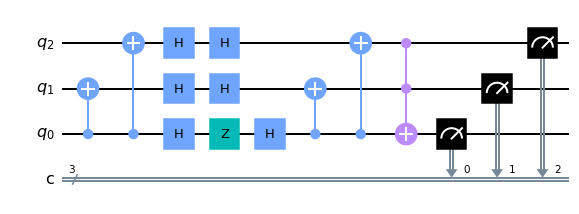

{'110': 100}


In [14]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


q =  QuantumRegister(3,"q") # quantum register with 3 qubits
c = ClassicalRegister(3,"c") # classical register with 3 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

#Apply a CNOT gate to ancillary qubits
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])


#Apply a Hadamard gate to all qubits 
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

#Simulate a Phase flip
qc.z(q[0])

#Bring qubits out of superposition by applying Hadamard gates again
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])


#Again apply CNOT gates to ancillary qubits
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])

#Apply a Toffoli gate to the main qubit
qc.ccx(q[2],q[1],q[0])


qc.measure(q,c)



# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl',reverse_bits=True))


# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)
